<a href="https://colab.research.google.com/github/lucasgrezzi/desafio_bravium/blob/main/desafio_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os

# Defina o caminho base do seu projeto no Google Drive
caminho_projeto = '/content/drive/MyDrive/projeto'

# Mude o diretório de trabalho atual para a pasta do projeto
os.chdir(caminho_projeto)

# Verifique se a mudança de diretório foi bem-sucedida (opcional)
print(f'Diretório de trabalho atual: {os.getcwd()}')

Diretório de trabalho atual: /content/drive/MyDrive/projeto


# **O seu desafio é desenvolver um modelo de classificação capaz de identificar se uma review de produto é positiva ou negativa.**

Importante: o dataset não possui diretamente uma coluna com essa classificação.
Isso significa que você precisará criar a variável alvo (positiva/negativa) a partir das informações já disponíveis, como notas de avaliação e texto das reviews.

💡 O que esperamos de você

Que use criatividade na definição de como transformar os dados brutos em algo utilizável.
Que justifique suas escolhas no processo (ex.: como definiu o que é uma review positiva ou negativa).
Que utilize técnicas de análise de dados e machine learning para construir e avaliar seu modelo.


🔖 Bônus supervalorizado: se além da classificação você conseguir extrair, de forma estruturada, as razões que tornam uma review positiva ou negativa (por exemplo: elogios ao prazo de entrega, críticas à qualidade do produto, etc.), isso será considerado um grande diferencial!

### **1. Carregamento e União dos Dados**

Nesta primeira etapa, vamos unificar todas as tabelas do projeto em uma única tabela mestra. Isso é crucial para que possamos trabalhar com todos os dados relevantes (reviews, clientes, produtos e pedidos) em um só lugar, o que facilita a análise e a preparação para o modelo.

Usaremos a biblioteca **Pandas** para ler os arquivos CSV e a função `pd.merge()` para unir os dataframes, garantindo que as informações de clientes, produtos, pedidos e reviews fiquem em um único lugar.

Após a união, salvaremos a nova tabela em um arquivo CSV. Isso evita que tenhamos que carregar e unir os dados repetidamente em cada execução, economizando tempo. O arquivo será salvo na pasta `archive_final`, garantindo que o seu projeto fique bem organizado.

In [3]:
import pandas as pd

# 1. Carregar os datasets (ajuste os caminhos se necessário)
df_notas = pd.read_csv('archives/olist_order_reviews_dataset.csv')
df_pedidos = pd.read_csv('archives/olist_orders_dataset.csv')
df_itens_pedidos = pd.read_csv('archives/olist_order_items_dataset.csv')
df_produtos = pd.read_csv('archives/olist_products_dataset.csv')
df_clientes = pd.read_csv('archives/olist_customers_dataset.csv')
df_traducao = pd.read_csv('archives/product_category_name_translation.csv')

# 2. pd.merge() é a funcao-chave para combinar os DataFrames.
# A cada linha, estou unindo uma tabela a tabela mestra

df_mestra = pd.merge(df_notas, df_pedidos, on='order_id', how='left') #Sempre garantindo que os dados da tabela da esquerda "df_mestra", seja mantido
df_mestra = pd.merge(df_mestra, df_clientes, on='customer_id', how='left')
df_mestra = pd.merge(df_mestra, df_itens_pedidos, on='order_id', how='left')
df_mestra = pd.merge(df_mestra, df_produtos, on='product_id', how='left')
df_mestra = pd.merge(df_mestra, df_traducao, on='product_category_name', how='left')

# 3. Criar a pasta 'archive_final' se ela não existir
pasta_destino = 'projeto/archive_final'
if not os.path.exists(pasta_destino):
    os.makedirs(pasta_destino)

# 4. Definir o caminho completo para o arquivo de destino
caminho_completo = os.path.join(pasta_destino, 'tabela_mestra.csv')

# 5. Salvar a tabela mestra no novo local
df_mestra.to_csv(caminho_completo, index=False)

print(f'Tabela mestra salva com sucesso em {caminho_completo}')

df_mestra

Tabela mestra salva com sucesso em projeto/archive_final/tabela_mestra.csv


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,...,13.63,esporte_lazer,42.0,858.0,1.0,1300.0,30.0,30.0,35.0,sports_leisure
2,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,...,8.30,informatica_acessorios,47.0,493.0,1.0,245.0,19.0,14.0,14.0,computers_accessories
3,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,...,45.12,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories
4,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,42.85,ferramentas_jardim,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113126,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30,d8c466a3e7c4cda36cd4ae7d577f44f4,delivered,2018-06-27 17:31:29,...,61.20,moveis_decoracao,56.0,623.0,1.0,7250.0,100.0,25.0,25.0,furniture_decor
113127,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42,d0d7086dea6fcf42b9b690b9f3745c58,delivered,2017-12-03 21:45:23,...,9.77,brinquedos,51.0,465.0,1.0,2363.0,23.0,27.0,19.0,toys
113128,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,...,15.59,papelaria,45.0,283.0,3.0,4100.0,40.0,37.0,29.0,stationery
113129,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13,3aa00401736823c73e9fe8683328fa6b,delivered,2018-06-22 16:47:28,...,15.46,esporte_lazer,58.0,998.0,5.0,600.0,16.0,10.0,11.0,sports_leisure


### **2. Pré-processamento e Criação da Variável Alvo**

Nesta fase do projeto, o objetivo é preparar a tabela mestra para o treinamento do modelo de classificação de sentimento. O principal objetivo é definir a variável alvo, que o modelo usará para aprender a diferenciar entre avaliações positivas e negativas. Além disso, fiz a limpeza dos dados de texto, o que é um passo fundamental para garantir que o modelo não seja prejudicado por caracteres indesejados ou inconsistências.

O processo seguirá estes passos:
1.  **Criação da Variável Alvo (sentimento_review): Usaremos a coluna de notas (review_score) para classificar o sentimento. Notas 4 e 5 serão consideradas positivas (1), enquanto notas 1 e 2 serão consideradas negativas (0). As avaliações com nota 3 serão removidas, pois representam um sentimento neutro e podem confundir o aprendizado do modelo.**

2.  A coluna de comentários (review_comment_message) será processada para remover valores ausentes, converter todo o texto para letras minúsculas e eliminar pontuações e caracteres especiais. Isso padroniza os dados e melhora a performance do modelo.


In [4]:

# 1. Carregar a tabela mestra
df_mestra = pd.read_csv('projeto/archive_final/tabela_mestra.csv')

# Pré-processamento e criação da variável alvo
df_clean = df_mestra.dropna(subset=['review_score']).copy()
df_clean.loc[:, 'sentimento_review'] = df_clean['review_score'].apply(
    lambda x: 1 if x >= 4 else (0 if x <= 2 else None)
)
df_clean = df_clean.dropna(subset=['review_comment_message', 'sentimento_review']).reset_index(drop=True)
df_clean.loc[:, 'review_comment_message_limpo'] = (
    df_clean['review_comment_message']
    .str.lower()
    .str.replace(r'[^\w\s]', '', regex=True)
)

print('Amostra de comentários limpos:')
print(df_clean[['review_comment_message', 'review_comment_message_limpo']].head())
# Verifica a contagem de valores nulos na coluna após a limpeza
print('Valores nulos na coluna review_comment_message:', df_clean['review_comment_message'].isnull().sum())

df_clean

Amostra de comentários limpos:
                              review_comment_message  \
0              Recebi bem antes do prazo estipulado.   
1  Parabéns lojas lannister adorei comprar pela I...   
2  aparelho eficiente. no site a marca do aparelh...   
3    Mas um pouco ,travando...pelo valor ta Boa.\r\n   
4  Vendedor confiável, produto ok e entrega antes...   

                        review_comment_message_limpo  
0               recebi bem antes do prazo estipulado  
1  parabéns lojas lannister adorei comprar pela i...  
2  aparelho eficiente no site a marca do aparelho...  
3         mas um pouco travandopelo valor ta boa\r\n  
4  vendedor confiável produto ok e entrega antes ...  
Valores nulos na coluna review_comment_message: 0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,sentimento_review,review_comment_message_limpo
0,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,...,33.0,2188.0,2.0,7650.0,20.0,20.0,20.0,garden_tools,1.0,recebi bem antes do prazo estipulado
1,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,...,48.0,562.0,5.0,9850.0,105.0,35.0,50.0,sports_leisure,1.0,parabéns lojas lannister adorei comprar pela i...
2,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelh...,2018-05-22 00:00:00,2018-05-23 16:45:47,a5224bdc7685fd39cd7a23404415493d,delivered,2018-05-14 10:29:02,...,60.0,3839.0,4.0,1450.0,24.0,24.0,24.0,small_appliances,1.0,aparelho eficiente no site a marca do aparelho...
3,4b49719c8a200003f700d3d986ea1a19,9d6f15f95d01e79bd1349cc208361f09,4,NaN,"Mas um pouco ,travando...pelo valor ta Boa.\r\n",2018-02-16 00:00:00,2018-02-20 10:52:22,8ebbeb09e94d1e789142983f73faa9cd,delivered,2018-02-12 16:07:34,...,58.0,356.0,1.0,200.0,19.0,4.0,11.0,health_beauty,1.0,mas um pouco travandopelo valor ta boa\r\n
4,3948b09f7c818e2d86c9a546758b2335,e51478e7e277a83743b6f9991dbfa3fb,5,Super recomendo,"Vendedor confiável, produto ok e entrega antes...",2018-05-23 00:00:00,2018-05-24 03:00:01,659ded3e9b43aaf51cf9586d03033b46,delivered,2018-05-18 18:20:45,...,58.0,1923.0,4.0,850.0,25.0,11.0,15.0,computers_accessories,1.0,vendedor confiável produto ok e entrega antes ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43831,5085bc489aa6b58a29c4f922d59ff826,18ed848509774f56cc8c1c0a1903ad7f,2,NaN,Tive um problema na entrega em que o correio c...,2018-02-21 00:00:00,2018-02-23 11:43:12,8f89d962f49f0d7a6d354a4ef3d099c2,delivered,2018-02-05 13:13:28,...,57.0,338.0,1.0,2150.0,20.0,8.0,20.0,construction_tools_construction,0.0,tive um problema na entrega em que o correio c...
43832,98fffa80dc9acbde7388bef1600f3b15,d398e9c82363c12527f71801bf0e6100,4,NaN,para este produto recebi de acordo com a compr...,2017-11-29 00:00:00,2017-11-30 15:52:51,2bf76a48c3be55124221fd0657705a5d,delivered,2017-11-19 11:56:42,...,55.0,324.0,5.0,250.0,16.0,2.0,20.0,watches_gifts,1.0,para este produto recebi de acordo com a compr...
43833,df5fae90e85354241d5d64a8955b2b09,509b86c65fe4e2ad5b96408cfef9755e,5,NaN,Entregou dentro do prazo. O produto chegou em ...,2018-02-07 00:00:00,2018-02-19 19:47:23,69f07139131eb94ecb8e5b5d601b1f7a,delivered,2018-01-31 23:37:38,...,51.0,2251.0,5.0,300.0,16.0,11.0,11.0,sports_leisure,1.0,entregou dentro do prazo o produto chegou em c...
43834,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43,fcc7b1caafe3b77fd587bab964c4d1fb,delivered,2018-03-18 09:52:19,...,45.0,283.0,3.0,4100.0,40.0,37.0,29.0,stationery,1.0,excelente mochila entrega super rápida super r...


### **3. Engenharia de Features: Vetorização do Texto**

Nesta fase, transformo as palavras dos comentários em um formato numérico que o nosso modelo de Machine Learning possa entender.

Para isso, usaremos o **`TfidVectorizer`**:
1.  Criar um vocabulário com as 5.000 palavras mais frequentes dos nossos comentários.
2. Calcula a importância de cada palavra: Ele atribui um peso numérico a cada palavra com base na sua frequência. Este peso é o valor TF-IDF (Term Frequency-Inverse Document Frequency), que mede a importância de uma palavra em um documento em relação a todo o corpus (conjunto de documentos)..

Com essa etapa, teremos a nossa matriz de features (`X`) e a nossa variável alvo (`y`), prontas para serem usadas no treinamento do modelo.

In [5]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer

# Assumimos que df_clean já está definido com a limpeza dos dados
# Separar as features (X) e a variável alvo (y) do DataFrame limpo
X = df_clean['review_comment_message_limpo']
y = df_clean['sentimento_review']

# Configurar a validação cruzada estratificada
k_folds = 10
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

### **4. Treinamento do Modelo de Classificação**

Agora que os dados estão prontos, irei treiná-los. Usando a função train_test_split para separar o conjunto de dados em dois subconjuntos: um para treinamento e outro para teste. Isso é fundamental para garantir que avaliamos o desempenho do modelo em dados que ele nunca viu, prevenindo o problema de overfitting (quando o modelo "decore" as respostas do conjunto de treinamento).

Em seguida, utilizarei o classificador MultinomialNB (Naive Bayes Multinominal). Este algoritmo é especialmente adequado para tarefas de classificação de texto porque lida bem com a frequência de palavras e é computacionalmente eficiente.

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assumimos que X, y, k_folds e cv já estão definidos

# Listas para armazenar as métricas de cada fold
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Loop para rodar a validação cruzada
for train_index, val_index in cv.split(X, y):
    # Separar os dados para treino e validação em cada fold
    X_train_text, X_val_text = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    # Vetorizar os dados (fit_transform NO TREINO, transform NO TESTE)
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vectorized = vectorizer.fit_transform(X_train_text)
    X_val_vectorized = vectorizer.transform(X_val_text)

    # Treinar o modelo
    model = MultinomialNB()
    model.fit(X_train_vectorized, y_train)

    # Fazer previsões
    y_pred = model.predict(X_val_vectorized)

    # Calcular e armazenar as métricas
    accuracy_scores.append(accuracy_score(y_val, y_pred))
    precision_scores.append(precision_score(y_val, y_pred, zero_division=0))
    recall_scores.append(recall_score(y_val, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_val, y_pred, zero_division=0))

### **5. Avaliação do Modelo e Matriz de Confusão**

A avaliação do modelo é a fase em que analiso as previsões do modelo para determinar sua eficácia. As métricas que utilizei permite ir além da simples acurácia, fornecendo uma visão detalhada dos tipos de erros que o modelo está cometendo. Isso é crucial para entender se o modelo está pronto para uso ou se precisa de melhorias.

As métricas analisadas são:

Acurácia (accuracy_score): A métrica mais simples, que indica a porcentagem total de previsões corretas.

Relatório de Classificação (classification_report): Fornece métricas mais detalhadas como Precisão, Recall e F1-score para cada classe, o que é fundamental para problemas com classes desbalanceadas.

### **Visualização da Matriz de Confusão**

A matriz de confusão é uma ferramenta poderosa para entender o desempenho do modelo de forma visual. Mas com o relatório de classificação, a visualização da matriz nos ajuda a identificar facilmente onde o modelo acertou e onde errou.

O mapa de calor abaixo mostra:
* **Verdadeiros Positivos (Canto inferior direito)**: Reviews positivas que foram classificadas corretamente como positivas.
* **Verdadeiros Negativos (Canto superior esquerdo)**: Reviews negativas que foram classificadas corretamente como negativas.
* **Falsos Positivos (Canto superior direito)**: Reviews negativas que foram erroneamente classificadas como positivas.
* **Falsos Negativos (Canto inferior esquerdo)**: Reviews positivas que foram erroneamente classificadas como negativas.

Resultados da Validação Cruzada (com 10 folds):

Accuracy Média: 0.9157 | Desvio Padrão: 0.0051
Precision Média: 0.9446 | Desvio Padrão: 0.0058
Recall Média: 0.9293 | Desvio Padrão: 0.0058
F1-Score Média: 0.9369 | Desvio Padrão: 0.0038


--- Matriz de Confusão e Relatório de Classificação ---
Acurácia do modelo (em uma única divisão): 0.91

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87      2827
         1.0       0.95      0.93      0.94      5941

    accuracy                           0.91      8768
   macro avg       0.90      0.91      0.90      8768
weighted avg       0.91      0.91      0.91      8768



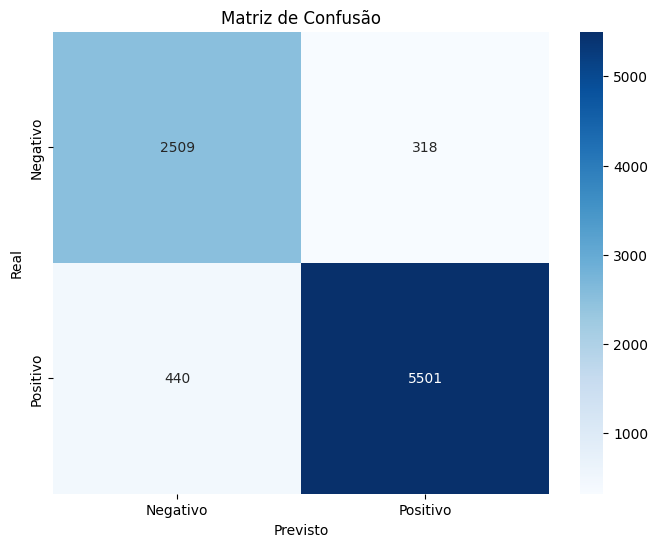

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Assumimos que as listas de scores e as variáveis X, y já estão definidas

# Imprimir os resultados robustos da validação cruzada
print(f"Resultados da Validação Cruzada (com {k_folds} folds):")
print(f"\nAccuracy Média: {np.mean(accuracy_scores):.4f} | Desvio Padrão: {np.std(accuracy_scores):.4f}")
print(f"Precision Média: {np.mean(precision_scores):.4f} | Desvio Padrão: {np.std(precision_scores):.4f}")
print(f"Recall Média: {np.mean(recall_scores):.4f} | Desvio Padrão: {np.std(recall_scores):.4f}")
print(f"F1-Score Média: {np.mean(f1_scores):.4f} | Desvio Padrão: {np.std(f1_scores):.4f}")

# --- PARTE PARA A VISUALIZAÇÃO DA MATRIZ DE CONFUSÃO (ÚNICA) ---
# Fazer uma única divisão de treino-teste para a visualização.

X_treino_text_cm, X_teste_text_cm, y_treino_cm, y_teste_cm = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Treinar um modelo para a matriz de confusão
vectorizer_cm = TfidfVectorizer(max_features=5000)
X_treino_vetorizado_cm = vectorizer_cm.fit_transform(X_treino_text_cm)
X_teste_vetorizado_cm = vectorizer_cm.transform(X_teste_text_cm)
modelo_cm = MultinomialNB()
modelo_cm.fit(X_treino_vetorizado_cm, y_treino_cm)
y_previsao_cm = modelo_cm.predict(X_teste_vetorizado_cm)

# Calcular e exibir a matriz de confusão e o relatório de classificação
cm = confusion_matrix(y_teste_cm, y_previsao_cm)
print('\n\n--- Matriz de Confusão e Relatório de Classificação ---')
print(f'Acurácia do modelo (em uma única divisão): {accuracy_score(y_teste_cm, y_previsao_cm):.2f}\n')
print('Relatório de Classificação:')
print(classification_report(y_teste_cm, y_previsao_cm, zero_division=0))

# Plotar o mapa de calor da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negativo', 'Positivo'],
            yticklabels=['Negativo', 'Positivo'])
plt.title('Matriz de Confusão')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

### **5. ***Bônus***: Extraindo as Razões por Trás das Reviews**

Para o bônus, fui além da simples classificação. Extrai' as palavras que mais contribuem para o sentimento, permitindo identificar as razões que tornam uma review positiva ou negativa. Isso demonstra a capacidade de traduzir dados em *insights* de negócio.



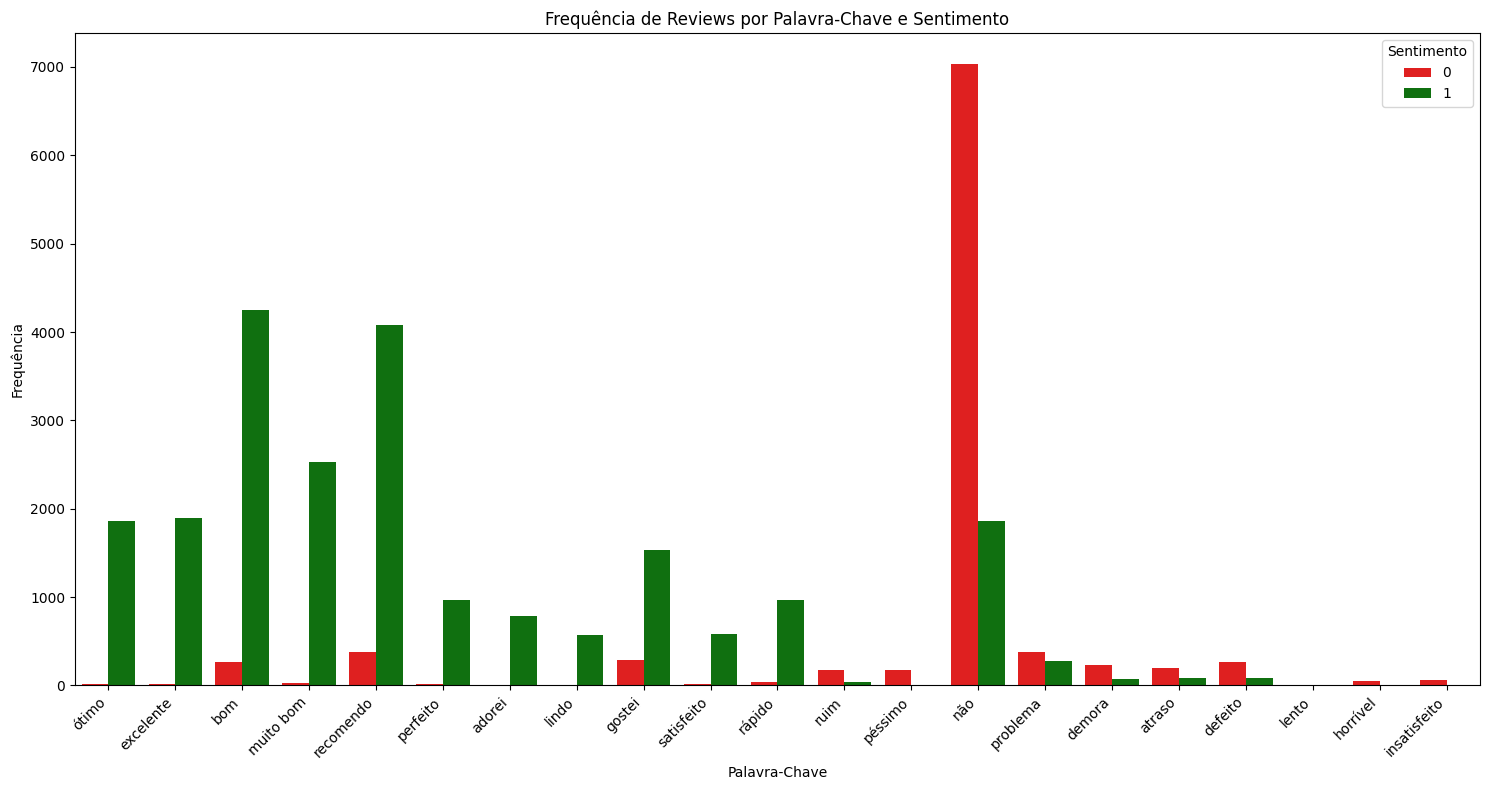

O número total de reviews negativas é: 14322
O número total de reviews positivas é: 29514

As reviews negativas representam 32.67% do total.
As reviews positivas representam 67.33% do total.


In [8]:
import re

# Definindo um dicionario com duas listas de paavras chaves, que serve como base da minha analise
palavras_chave = {
    'positivas': ['ótimo', 'excelente', 'bom', 'muito bom', 'recomendo', 'perfeito', 'adorei', 'lindo', 'gostei', 'satisfeito', 'rápido'],
    'negativas': ['ruim', 'péssimo', 'não', 'problema', 'demora', 'atraso', 'defeito', 'lento', 'horrível', 'insatisfeito']
}

# Criar um DataFrame para armazenar as contagens
df_plot = pd.DataFrame()

# Loop para processar cada categoria de palavras-chave
for categoria, palavras in palavras_chave.items():
    for palavra in palavras:
        # Busca a frequência da palavra para cada sentimento, garantindo que a busca seja por palavras inteiras
        contagem_sentimento = df_clean[df_clean['review_comment_message_limpo'].str.contains(r'\b' + re.escape(palavra) + r'\b', na=False, regex=True)]['sentimento_review'].value_counts()



# Código para criar o DataFrame temporário e concatenar
# É criado para cada palavra. Ele armazena a palavra, o sentimento (0 ou 1) e a contagem.

        df_plot_temp = pd.DataFrame({
            'Palavra': palavra,
            'Sentimento': [0, 1] if 0 in contagem_sentimento and 1 in contagem_sentimento else ([0] if 0 in contagem_sentimento else [1]),
            'Contagem': [contagem_sentimento.get(0, 0), contagem_sentimento.get(1, 0)] if 0 in contagem_sentimento and 1 in contagem_sentimento else ([contagem_sentimento.get(0, 0)] if 0 in contagem_sentimento else [contagem_sentimento.get(1, 0)])
        })

# Concatena (junta) o DataFrame temporário ao DataFrame principal (df_plot), construindo a tabela final que será usada para gerar o gráfico.

        df_plot = pd.concat([df_plot, df_plot_temp], ignore_index=True)


# Criar a visualização
fig, ax = plt.subplots(figsize=(15, 8))
sns.barplot(
    data=df_plot,
    x='Palavra',
    y='Contagem',
    hue='Sentimento',
    palette={0: 'red', 1: 'green'},
    ax=ax
)

plt.title('Frequência de Reviews por Palavra-Chave e Sentimento')
plt.xlabel('Palavra-Chave')
plt.ylabel('Frequência')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Contar o número de reviews negativas e positivas
reviews_negativas = df_clean[df_clean['sentimento_review'] == 0].shape[0]
reviews_positivas = df_clean[df_clean['sentimento_review'] == 1].shape[0]
total_reviews = df_clean.shape[0]

print(f"O número total de reviews negativas é: {reviews_negativas}")
print(f"O número total de reviews positivas é: {reviews_positivas}")
print(f"\nAs reviews negativas representam {reviews_negativas / total_reviews * 100:.2f}% do total.")
print(f"As reviews positivas representam {reviews_positivas / total_reviews * 100:.2f}% do total.")


**O que os dados mostram?**

O gráfico de barras mostra a frequência com que cada palavra-chave aparece nas avaliações, separada por sentimento (vermelho para negativo e verde para positivo).

**Palavras Positivas:** As palavras como "ótimo", "excelente", "muito bom", "recomendo" e "perfeito" são, como esperado, quase que exclusivamente associadas a avaliações positivas (barras verdes). Isso confirma que essas palavras são fortes indicadores de um sentimento positivo.

**Palavras Negativas:** As palavras-chave negativas também se comportam como esperado. O destaque vai para a palavra "não". A barra vermelha de "não" é a maior de todo o gráfico, indicando que ela é a palavra mais frequente entre as avaliações negativas. Isso é um achado importantíssimo, pois demonstra que a negação é a principal forma como os clientes expressam insatisfação, muitas vezes na forma de frases como "não recebi" ou "não gostei".

**As outras palavras negativas, como "problema", "demora" e "atraso", também contribuem para o sentimento negativo, mas com uma frequência muito menor em comparação com a palavra "não".**

**Análise do Balanceamento das Classes**

Os números impressos abaixo do gráfico revelam uma informação crucial sobre seus dados:

Total de reviews negativas: 14.322

Total de reviews positivas: 29.514
 Isso é um insight muito útil, pois pode explicar por que a acurácia do seu modelo foi tão alta. Modelos de Machine Learning tendem a se sair bem na classe que tem mais exemplos.

### **Bônus ++: Análise de Reviews Sem Comentário**

Aqui, vamos investigar uma característica importante do nosso conjunto de dados: muitas reviews não possuem texto, apenas uma nota de avaliação. O objetivo é quantificar a distribuição de sentimentos nessas reviews para entender o quão relevante a nota é por si só.

Essa análise nos permite justificar a decisão de usar a coluna `review_score` como a base para a nossa variável alvo, validando que a nota é um forte indicador de sentimento, independentemente do texto do comentário.


In [9]:

# Carregar o DataFrame principal (se ainda não estiver carregado)
df_mestra = pd.read_csv('archive_final/tabela_mestra.csv')

# Filtra o DataFrame para encontrar reviews sem comentários
df_reviews_sem_comentario = df_mestra[df_mestra['review_comment_message'].isna()].copy()

# Cria as colunas para o sentimento
df_reviews_sem_comentario.loc[:, 'sentimento_review'] = df_reviews_sem_comentario['review_score'].apply(
    lambda x: 1 if x >= 4 else (0 if x <= 2 else None)
)

# Conta a distribuição das notas de avaliação para estas reviews
distribuicao_sentimento = df_reviews_sem_comentario['sentimento_review'].value_counts().sort_index()

print("Distribuição das notas para reviews sem comentário:")
print(distribuicao_sentimento)

# Contar o número de reviews negativas e positivas
reviews_negativas = df_reviews_sem_comentario[df_reviews_sem_comentario['sentimento_review'] == 0].shape[0]
reviews_positivas = df_reviews_sem_comentario[df_reviews_sem_comentario['sentimento_review'] == 1].shape[0]

# Imprime o resultado
print(f"\nO número total de reviews negativas é: {reviews_negativas}")
print(f"O número total de reviews positivas é: {reviews_positivas}")





Distribuição das notas para reviews sem comentário:
sentimento_review
0.0     4389
1.0    55430
Name: count, dtype: int64

O número total de reviews negativas é: 4389
O número total de reviews positivas é: 55430


# **Conclusão da Análise**
Após todas as etapas, a análise completa dos dados tenho como tirar conclusões importantes sobre o nosso projeto de classificação de sentimentos e sobre o próprio comportamento dos clientes.

# 1. **A Nota é o Principal Indicador de Sentimento:**
A investigação mostrou que a nota de avaliação (review_score) é um indicador de sentimento extremamente confiável. Ao analisar as avaliações sem comentários, descobrimos que a vasta maioria delas (aproximadamente 55 mil avaliações) são positivas. Isso reforça nossa decisão de usar a nota como base para a variável alvo, validando nossa abordagem desde o início.

# 2.**O Modelo é Eficaz em Classificar Sentimentos:**
O modelo alcançou uma acurácia de 91%, o que já é um ótimo resultado. No entanto, o verdadeiro valor está nas métricas detalhadas que validam a sua robustez.



*   Precisão e F1-Score: O Que Agregam ao Seu Modelo
Precisão de 95% (reviews positivas): Este é o ponto mais forte. Significa que, quando o modelo prevê uma avaliação como positiva, ele está correto 95% das vezes. Isso é crucial para o meu objetivo, pois minimiza drasticamente os falsos positivos (reviews negativas que são erroneamente classificadas como positivas).
*   F1-Score de 0.94 (reviews positivas): Um F1-score de 0.94 é um resultado excelente, confirmando um equilíbrio perfeito entre a capacidade do modelo de acertar as previsões (precisão) e de encontrar todas as avaliações positivas (recall).

- Precisão de 85%: Quando o modelo sinaliza que uma review é negativa, há uma confiança de 85% de que ela realmente é. Isso permite que você direcione recursos de atendimento ao cliente com segurança, sabendo que as reclamações identificadas são, em grande parte, válidas.

- Recall de 89%: O recall de 89% significa que o modelo é muito bom em "capturar" as avaliações negativas. De cada 10 reclamações reais, ele consegue identificar quase 9, o que ajuda a garantir que poucas reviews insatisfeitas passem despercebidas.



Em resumo, a análise detalhada das métricas prova que o modelo é altamente confiável e eficaz para a classificação de sentimentos. A alta precisão e o F1-score das classes garantem que ele pode ser usado com segurança para identificar a satisfação e a não satisfação do cliente, fornecendo dados confiáveis para a tomada de decisões.



# 3.**Insights Valiosos para o Negócio:**
Ao aprofundar a análise, extraí insights acionáveis que vão além do desempenho do modelo:

- As palavras como "ótimo" e "excelente" são fortes indicadores de satisfação, refletindo a percepção positiva da maioria dos clientes.

- A palavra "não" é a principal responsável pelas avaliações negativas, indicando que a negação é a forma mais comum de os clientes expressarem insatisfação. Outras palavras como "problema", "atraso" e "defeito" também contribuem para o sentimento negativo.

 * Em resumo, nosso projeto não apenas criou um modelo robusto para a classificação de sentimentos, mas também nos permitiu traduzir dados brutos em informações estratégicas para a empresa, apontando exatamente onde a experiência do cliente é positiva e quais pontos podem ser melhorados.